In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as matplotlib
print(matplotlib.__version__)

3.3.4


In [46]:
FIGSIZE = (12,5)
FONTSIZE = 14

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
actual_profit = pd.read_excel('./data/Годовые отчеты об исполнении бюджета/2020.xlsx', sheet_name='доходы (исполнено), 2020', header=1)
actual_profit = actual_profit.drop(0)
#profit_2010.columns = {'Расходы', }
actual_profit

,Unnamed: 0,Unnamed: 1,"(19) Исполнено, конс. бюджет субъекта РФ","(21) Исполнено, бюджет субъекта РФ"
1,НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,1 00 00000 00 0000 000,34709506555.89,27131141282.57
2,"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",1 01 00000 00 0000 000,19694767431.25,15165765187.88
3,Налог на прибыль организаций,1 01 01000 00 0000 110,5058407816.68,5058407816.68
4,"Налог на прибыль организаций, зачисляемый в бю...",1 01 01010 00 0000 110,5058407816.68,5058407816.68
5,Налог на прибыль организаций (за исключением к...,1 01 01012 02 0000 110,3305591625.02,3305591625.02
...,...,...,...,...
1258,Возврат остатков субсидий прошлых лет на социа...,2 19 51980 02 0000 151,NaN,NaN
1259,Возврат остатков субсидий прошлых лет на софин...,2 19 52090 02 0000 151,NaN,NaN
1260,Возврат остатков субсидий на софинансирование ...,2 19 54020 02 0000 151,NaN,NaN
1261,"Возврат прочих остатков субсидий, субвенций и ...",2 19 90000 02 0000 150,-69696.26,-69696.26


In [16]:
PATH = './data/Годовые отчеты об исполнении бюджета/'
AGE_BEGIN = 2010
AGE_END = 2020

years = [year for year in range(AGE_BEGIN,AGE_END+1)]
profits_actual = {}
consumptions_actual = {}

for year in years:
    if year > 2015:
         comma = ','
    else:
        comma = ''
        
    #
    try:
        cons = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'расходы (исполнено){comma} {year}', header=1)
    except:
        cons = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'расходы (исполнено){comma} {year}', header=1)
    #cons = cons.drop(0)
    consumptions_actual[year] = cons

    #
    try:
        profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (исполнено){comma} {year}', header=0)
    except:
        profit = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'доходы (исполнено){comma} {year}', header=0)
    profit = profit.drop(0)
    profits_actual[year] = profit

In [17]:
PATH = './data/Первоначальные бюджетные данные/'
AGE_BEGIN = 2010
AGE_END = 2020

years = [year for year in range(AGE_BEGIN,AGE_END+1)]
profits_planned = {}
consumptions_planned = {}

for year in years:
    if year > 2017:
         comma = ','
    else:
        comma = ''
        
    #
    try:
        cons = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'расходы (план){comma} {year}', header=1)
    except:
        cons = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'расходы (план){comma} {year}', header=1)
    cons = cons.drop(0)
    consumptions_planned[year] = cons

    #
    try:
        profit = pd.read_excel(f'{PATH}{year}.xlsx', sheet_name=f'доходы (план){comma} {year}', header=0) 
    except:
        profit = pd.read_excel(f'{PATH}{year}.xls', sheet_name=f'доходы (план){comma} {year}', header=0)
    profit = profit.drop(0)
    profits_planned[year] = profit

In [62]:
#for year in years:
#    print(year, profits_actual[year].columns)

In [19]:
profit_a = [profits_actual[y].iloc[0,-2] for y in profits_actual]
profit_a

[31850910313,
 35935356067.74,
 33150930793.99,
 30576682754.19,
 34117735931.87,
 34801533070.6,
 39323606617.18,
 41108607816.91,
 54378039681.2,
 58543527525.81,
 68182687573.07]

<BarContainer object of 11 artists>

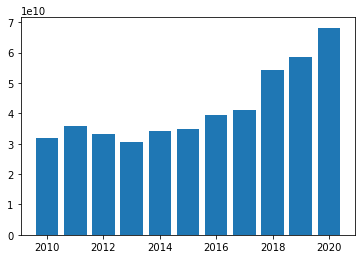

In [20]:
plt.bar(years, profit_a)

In [21]:
cons_a = [consumptions_actual[y].iloc[0,-2] for y in consumptions_actual]
cons_a

[32339620917.23,
 36094035735.2,
 35395090715.12,
 36462680559.25,
 37834580535.25,
 38578878408.6,
 41940943706.32,
 43592744886.32,
 50243339293.27,
 57556214364.0,
 75012480823.91]

<BarContainer object of 11 artists>

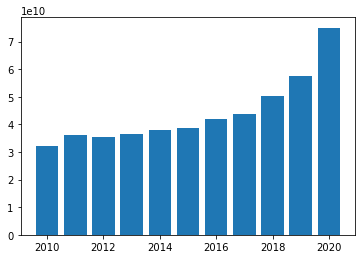

In [22]:
plt.bar(years, cons_a)

In [23]:
cons_p = [consumptions_planned[y].iloc[0,-2] for y in consumptions_planned]
cons_p

[27267621558.77,
 30678999189.34,
 33373255036.25,
 35908117909.17,
 35462598758.36,
 36445157936.74,
 39421571162.21,
 41711472799.61,
 45510986678.11,
 56829983031.29,
 67884032045.79]

<BarContainer object of 11 artists>

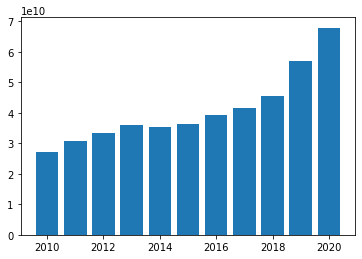

In [24]:
plt.bar(years, cons_p)

In [25]:
profit_p = [profits_planned[y].iloc[0,-2] for y in profits_planned]
profit_p

[25254031795.5,
 28537754154.88,
 30373124329.5,
 31767244595.02,
 31893892039.69,
 32863651767.17,
 29380712000,
 39469802278.5,
 45085835113.33,
 56647722253.09,
 65316890463.51]

<BarContainer object of 11 artists>

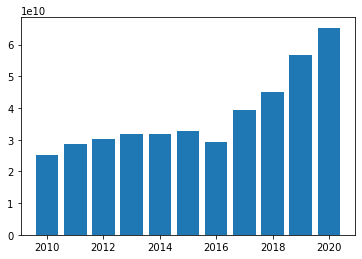

In [26]:
plt.bar(years, profit_p)

<BarContainer object of 11 artists>

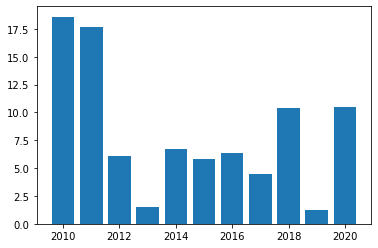

In [27]:
plt.bar(years, [(a/p-1)*100 for p,a in zip(cons_p,cons_a)])
#plt.set_xticks(years)

In [28]:
[(a/p-1)*100 for p,a in zip(cons_p,cons_a)]

[18.600813230183277,
 17.650629710703058,
 6.058251365274048,
 1.5443935309636059,
 6.688685713792553,
 5.854606188190004,
 6.390847624371454,
 4.510202974006683,
 10.398264156808912,
 1.277901723655539,
 10.500921296648414]

In [59]:
def plot_compare_plan_actual(plan=None, actual=None, title=None):
    width = 0.4  # the width of the bars
    x = np.arange(len(years))

    fig, ax = plt.subplots(figsize=FIGSIZE)
    rects1 = ax.bar(x - width/2,  plan, width, label='Планируемые')
    rects2 = ax.bar(x + width/2, actual, width, label='Фактические')
    #ax.plot(x, actual)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('руб', fontsize=FONTSIZE+2)
    ax.set_xlabel('год', fontsize=FONTSIZE+2)

    ax.set_title(title, fontsize=FONTSIZE+4)
    ax.set_xticks(x)
    ax.set_xticklabels([str(y) for y in years], fontsize=FONTSIZE)
    #ax.set_yticklabels(fontsize=FONTSIZE)
    ax.legend()

    rects = ax.patches

    # Make some labels.
    labels = [f"{(a/p-1)*100:.2f}%" for p,a in zip(plan*2,actual*2)]

    for i, (rect, label) in enumerate(zip(rects, labels)):
        if i%2:
            continue
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width(), height + 500, label, ha="center", va="bottom", fontsize=FONTSIZE+2
        )

    fig.tight_layout()

    plt.show()

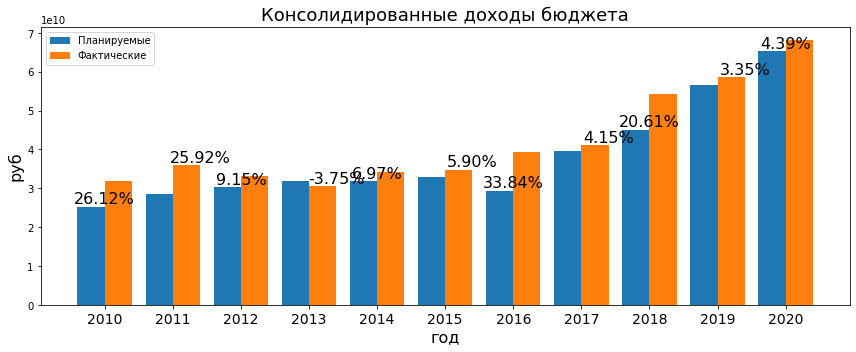

In [60]:
plot_compare_plan_actual(profit_p, profit_a, 'Консолидированные доходы бюджета')

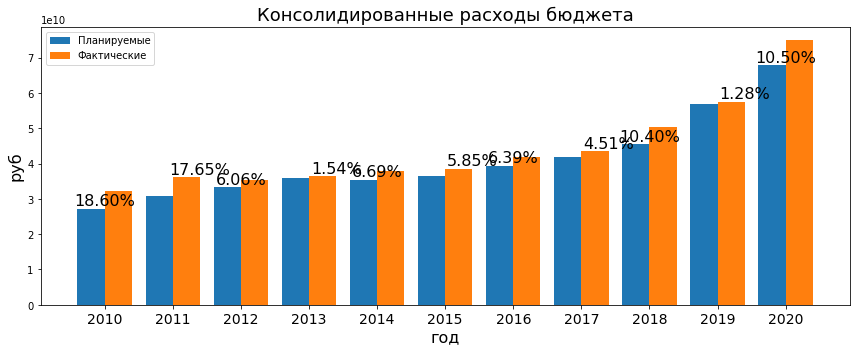

In [61]:
plot_compare_plan_actual(cons_p, cons_a, 'Консолидированные расходы бюджета')